In [1]:
!pip install -Uqq fastbook

In [69]:
import fastbook
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [6]:
(path/'training').ls()

(#10) [Path('training/6'),Path('training/9'),Path('training/1'),Path('training/3'),Path('training/4'),Path('training/2'),Path('training/8'),Path('training/7'),Path('training/5'),Path('training/0')]

In [7]:
digits = [img.ls().sorted() for img in sorted((path/'training').iterdir())]
digits[0]

(#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...]

In [8]:
valid_digits = [img.ls().sorted() for img in sorted((path/'testing').iterdir())]
valid_digits[0]

(#980) [Path('testing/0/10.png'),Path('testing/0/1001.png'),Path('testing/0/1009.png'),Path('testing/0/101.png'),Path('testing/0/1034.png'),Path('testing/0/1047.png'),Path('testing/0/1061.png'),Path('testing/0/1084.png'),Path('testing/0/1094.png'),Path('testing/0/1121.png')...]

In [9]:
im3_path = digits[3][0]
im3 = Image.open(im3_path)
im3

In [10]:
len(digits[0])

5923

In [11]:
all_digit_tensors = {}
i = 0
for digit in digits:
    curr_digit_tensors = []
    for img in digit:
        curr_digit_tensors.append(tensor(Image.open(img)))
    all_digit_tensors[i] = curr_digit_tensors
    i += 1

len(all_digit_tensors),len(all_digit_tensors[7])

(10, 6265)

In [12]:
# same for valid dataset
all_valid_tensors = {}
i = 0
for valid_digit in valid_digits:
    curr_digit_tensors = []
    for img in valid_digit:
        curr_digit_tensors.append(tensor(Image.open(img)))
    all_valid_tensors[i] = curr_digit_tensors
    i += 1
len(all_valid_tensors),len(all_valid_tensors[0])

(10, 980)

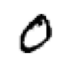

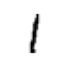

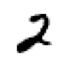

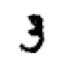

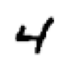

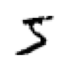

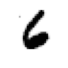

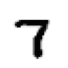

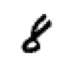

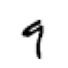

In [13]:
[show_image(all_digit_tensors[i][0]) for i in range(10)];

In [14]:
all_digit_tensors[0][0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 2

In [26]:
# stack all digits to a single rank 3 tensor
# divide by 255 to make values binary
stacked_numbers = {i: torch.stack(digit_tensors).float() / 255 for i, digit_tensors in all_digit_tensors.items()}

len(stacked_numbers),stacked_numbers[0].shape

(10, torch.Size([5923, 28, 28]))

In [27]:
# same for valid dataset
stacked_valid_digits = {i: torch.stack(valid_tensors).float() / 255 for i, valid_tensors in all_valid_tensors.items()}
len(stacked_valid_digits),stacked_valid_digits[0].shape

(10, torch.Size([980, 28, 28]))

In [28]:
mean_numbers = {i: digit_tensors.mean(0) for i, digit_tensors in stacked_digits.items()}
stacked_digits[0].shape, mean_numbers[0].shape

(torch.Size([5923, 28, 28]), torch.Size([28, 28]))

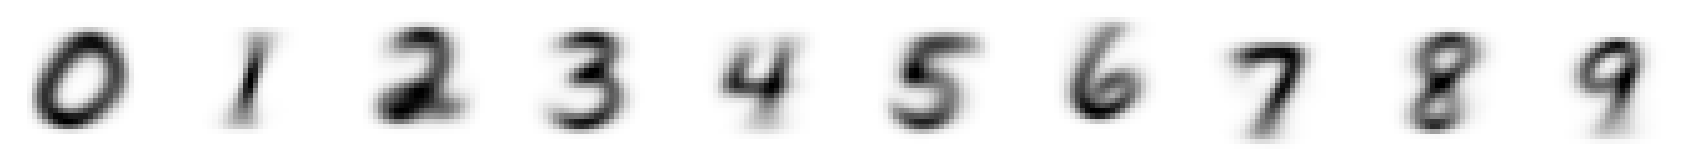

In [29]:
show_images(list(mean_numbers.values()))

<AxesSubplot:>

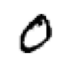

In [30]:
ex_zero = stacked_digits[0][0]
show_image(ex_zero)

In [31]:
# calculate distance from mean digit for each digit
for i in range(10):
    mean = mean_numbers[i]
    digit = stacked_digits[i]
    distance = (digit - mean).abs().mean()
    print(f"{i}: {distance}")

0: 0.14436744153499603
1: 0.06666460633277893
2: 0.1461019217967987
3: 0.13126492500305176
4: 0.11998098343610764
5: 0.13792230188846588
6: 0.125173419713974
7: 0.10961710661649704
8: 0.13284289836883545
9: 0.11311935633420944


In [32]:
def diff(a, b):
    return (a - b).abs().mean((-1, -2))

In [33]:
test_stacked_numbers = {i : torch.stack(valid_tensor).float() / 255 for i, valid_tensor in all_valid_tensors.items()}

In [34]:
print(tensor([1, 2, 3]).shape)
accuracies = []
for i, stacked in test_stacked_numbers.items():
    errs = [diff(stacked, mean_numbers[num]) for num in range(10)]
    stacked_errs = torch.stack(errs)
    min = stacked_errs.min(0)
    acc = (tensor(i) == min.indices).float().mean()
    print("Label:", i, "had an accuracy of:", acc)
    accuracies.append(acc)
print("Overall accuracy:", tensor(accuracies).mean())

torch.Size([3])
Label: 0 had an accuracy of: tensor(0.8153)
Label: 1 had an accuracy of: tensor(0.9982)
Label: 2 had an accuracy of: tensor(0.4234)
Label: 3 had an accuracy of: tensor(0.6089)
Label: 4 had an accuracy of: tensor(0.6680)
Label: 5 had an accuracy of: tensor(0.3262)
Label: 6 had an accuracy of: tensor(0.7871)
Label: 7 had an accuracy of: tensor(0.7646)
Label: 8 had an accuracy of: tensor(0.4425)
Label: 9 had an accuracy of: tensor(0.7760)
Overall accuracy: tensor(0.6610)


In [36]:
# concatanete 10 rank 3 tensors to a vector of rank 2 tensor
train_x = torch.cat([stacked_numbers[i] for i in range(10)]).view(-1, 28*28)
# for each of the labels, we create a 1x10 tensor representing the correct label
train_y = tensor([[1 if i == num else 0 for i in range(10)] for num, images in all_digit_tensors.items() for _ in range (len(images))])
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [38]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [39]:
test_x = torch.cat([stacked_valid_digits[i] for i in range(10)]).view(-1, 28*28)
test_y = tensor([[1 if i == num else 0 for i in range(10)] for num, images in all_valid_tensors.items() for _ in range (len(images))])
print(test_x.shape, test_y.shape)
test_dset = list(zip(test_x, test_y))
x, y = test_dset[0]
x.shape, y

torch.Size([10000, 784]) torch.Size([10000, 10])


(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [48]:
# Creating / Training a Linear Model
def init_params(size, std=1.0):
    return (torch.randn(size) * std).requires_grad_()

weights = init_params((28*28, 10))
bias = init_params(10)

In [49]:
def linear_model(xbatch):
    return xbatch @ weights + bias
preds = linear_model(train_x)
preds, preds.shape

(tensor([[  1.0994,   1.5071,   3.4678,  ...,  -5.0861,  -4.1259,  11.1209],
         [  6.0182,  -8.7752,  -4.8092,  ...,   2.9232,  -1.7839,  -3.8677],
         [ -5.5343,   5.5729,  -4.6057,  ...,  -0.6113,  -4.0902,  15.2562],
         ...,
         [ -3.3576,  -0.7032, -25.5369,  ...,  -0.1770,   0.7605,   4.9850],
         [  0.6908,   0.1129,   1.0010,  ...,  -2.7224,   0.8520,   0.5853],
         [ -2.2322,  -5.4309, -13.5353,  ...,   0.4094,   3.0625,  10.0834]], grad_fn=<AddBackward0>),
 torch.Size([60000, 10]))

In [50]:
def cross_entropy_loss(xbatch, ybatch):
    probs = xbatch.softmax(dim=1)
    loss = -(ybatch * probs.log()).sum() / len(probs)
    return loss

In [53]:
dl = DataLoader(dset, batch_size=64)
test_dl = DataLoader(test_dset, batch_size=64)
a_batch = first(dl)
a_batch[0].shape, a_batch[1].shape

(torch.Size([64, 784]), torch.Size([64, 10]))

In [58]:
images, labels = a_batch
preds = linear_model(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(11.5259, grad_fn=<DivBackward0>)

In [59]:
loss.backward()
lr = 1e-3
weights.data -= weights.grad * lr
bias.data -= bias.grad * lr
weights.grad.zero_()
bias.grad.zero_()
preds = linear_model(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(11.4306, grad_fn=<DivBackward0>)

In [60]:
def calc_grad(xbatch, ybatch, model):
    preds = model(xbatch)
    loss = cross_entropy_loss(preds, ybatch)
    loss.backward()

In [61]:
def batch_accuracy(xpreds, ybatch):
    return (xpreds.max(1).indices == ybatch.max(1).indices).float().mean()

In [62]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xbatch), ybatch) for xbatch, ybatch in test_dl]
    return round(torch.stack(accs).mean().item(), 4)
validate_epoch(linear_model)

0.187

In [63]:
def train_epoch(model, lr, params):
    for xbatch, ybatch in dl:
        calc_grad(xbatch, ybatch, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [64]:
lr = 1e-3
params = weights, bias
train_epoch(linear_model, lr, params)
validate_epoch(linear_model)

0.2125

In [65]:
for i in range(40):
    train_epoch(linear_model, lr, params)
    print(validate_epoch(linear_model), end= ' ')

0.2261 0.2453 0.2726 0.2974 0.323 0.3525 0.3816 0.4081 0.43 0.4486 0.4665 0.4858 0.502 0.5171 0.5308 0.5436 0.5563 0.5707 0.5818 0.591 0.6004 0.6089 0.6168 0.6259 0.6349 0.6433 0.6523 0.6576 0.6635 0.6685 0.6742 0.6792 0.6825 0.6874 0.6921 0.6953 0.6993 0.7036 0.7077 0.711 

In [66]:
# Creating an Optimizer
linear_model = nn.Linear(28 * 28, 10)

In [67]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [75]:
opt = SGD(linear_model.parameters(), lr)

In [76]:
def train_epoch(model):
    for xbatch, ybatch in dl:
        calc_grad(xbatch, ybatch, model)
        opt.step()
        opt.zero_grad()

In [77]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [78]:
train_model(linear_model, 20)

0.1503 0.384 0.5259 0.6101 0.6714 0.7106 0.7371 0.7622 0.7788 0.7935 0.8035 0.8129 0.8195 0.8268 0.832 0.8372 0.8417 0.8455 0.8495 0.8531 